In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats
import math
import seaborn as sns

### Matlab Code

In [ ]:
## Matlab Code:
function plotprob
hold off
models = 0:.1:1;
priors = ones(size(models))/size(models,2)
h = 0; t = 0;
ct = 1;
label = 'priors';
for outcome = [1 0 0 1 0 0 0 1 ]
   subplot(2,4,ct)
   ct
   posterior = generate_posteriors (h, t, priors, models);
   %plot(models, posterior);
   hold off
   plot(models, posterior,'*');
   hold on
   title(label);
   xlabel('model');
   set(gca,'ylim',[0 .3]);
   h = h + outcome;
   t = t + (1-outcome);
   label = 'T';
   if (outcome)
      label = 'H';
   end
   label = sprintf('trial %d: %s',ct,label);
   ct = ct + 1;
end
%print -depsc2 simulate_coin_flip_discrete.eps

function posterior = generate_posteriors(h,t,prior,p)
% compute posterior of hypothesis "p" given "h" heads, "t" tails and prior for p

posterior = prior .* p.^h .* (1-p).^t;
posterior = posterior ./ sum(posterior);



the PDF of the Beta Distribution is: $$ \frac{x^{\alpha - 1}(1-x)^{\beta - 1}}{B(\alpha, \beta)}$$
Where $$B(\alpha, \beta) = \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha + \beta)}$$

## Part 1
In the 2/8 lecture, I provided MATLAB code (above) that implements Bayesian updating of a discrete hypothesis space for the bias of a coin. I want you to write code to generate my figure for the continuous distribution using the Beta probability density function. Note that when you make plots, you will necessaily sample the continuous density at discrete points, but your code should be computing the parameters of the bta posterior from the parameters of the beta prior and observation sequence.

In [9]:
def beta_function(alpha, beta):
    # Gamma(n) = (n-1)!
    return (math.factorial(alpha-1) * math.factorial(beta - 1))/(math.factorial(alpha + beta - 1))

In [29]:
def problem1(granularity):
    result_arrays = []
    test_array = [i for i in np.arange(0, 1 + 1/granularity, 1/granularity)]
    # Using a constant prior among all samples (Using a function to modify priors if necessary)
    result_arrays.append(np.ones( granularity+1) * prior)
    observations = [1, 0, 0, 1, 0, 0, 0]
    # Create 8 arrays with 101 elements:
    for i in range(len(observations)):
        heads = sum(observations[:i+1])
        tails = i + 1 - heads
        posterior = scipy.stats.beta.pdf(x=test_array.copy(), a=(heads + 1), b=(tails + 1))
        result_arrays.append(posterior)
    return test_array, result_arrays

In [27]:
test_array, result_arrays = problem1(100)

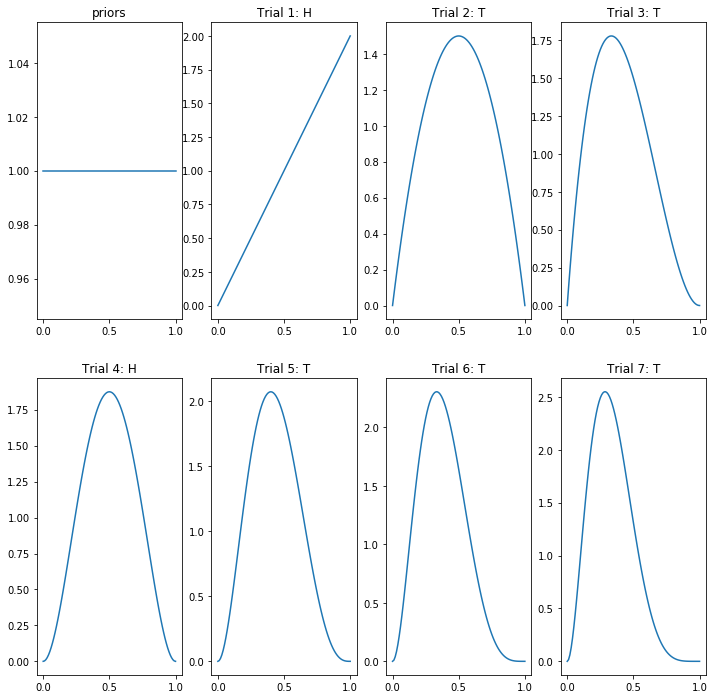

In [28]:
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(241)
ax1.plot(test_array, result_arrays[0])
ax1.title.set_text("priors")

ax2 = fig.add_subplot(242)
ax2.plot(test_array, result_arrays[1])
ax2.title.set_text("Trial 1: H")


ax3 = fig.add_subplot(243)
ax3.plot(test_array, result_arrays[2])
ax3.title.set_text("Trial 2: T")


ax4 = fig.add_subplot(244)
ax4.plot(test_array, result_arrays[3])
ax4.title.set_text("Trial 3: T")


ax5 = fig.add_subplot(245)
ax5.plot(test_array, result_arrays[4])
ax5.title.set_text("Trial 4: H")


ax6 = fig.add_subplot(246)
ax6.plot(test_array, result_arrays[5])
ax6.title.set_text("Trial 5: T")


ax7 = fig.add_subplot(247)
ax7.plot(test_array, result_arrays[6])
ax7.title.set_text("Trial 6: T")


ax8 = fig.add_subplot(248)
ax8.plot(test_array, result_arrays[7])
ax8.title.set_text("Trial 7: T")


# Part II

For each of these examples, compute the (unscaled) log likelihood of motion over a range of velocities. Assume the velocities are discrete have horizontal and vertical components that must be one of {-2, -1, 0, 1, 2}.  These velocities are expressed in pixels moved between successive frames.


The likelihood of motion will be the product of pixelwise likelihoods for every pixel in the image. Therefore, the log likelihood of motion will be the sum of the pixelwise log likelihoods. To compute the (unscaled) log likelihood of motion for each pixel (x, y)  and velocity (vx, vy), use this expression similar to that on slide 25 of the lecture notes:


$$p(I_1, I_2 \vert \mathcal{v}) \sim exp\left(-\frac{[I_1(x, y) - I_2(x + \mathcal{v}_x, y + \mathcal{v}_y)]^2}{2\sigma^2}\right)$$

remember that log likelihoods are nonpositive, and the largest possible log likelihood value is 0. 

The value of $\sigma^2$ will not matter for computing the (unscaled) log likelihood

In [7]:
exampleA1 = [
    [1,0,0,0,0,0,0,0,0,0],
    [1,0,0,0,0,0,0,0,0,0],
    [0,1,0,0,0,0,0,0,0,0],
    [0,1,0,0,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,0,0,0],
    [0,0,0,1,0,0,0,0,0,0],
    [0,0,0,1,0,0,0,0,0,0],
    [0,0,0,0,1,0,0,0,0,0],
    [0,0,0,0,1,0,0,0,0,0],
];
exampleA2 = [
    [0,1,0,0,0,0,0,0,0,0],
    [0,1,0,0,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,0,0,0],
    [0,0,0,1,0,0,0,0,0,0],
    [0,0,0,1,0,0,0,0,0,0],
    [0,0,0,0,1,0,0,0,0,0],
    [0,0,0,0,1,0,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,0],
];
exampleB1 = [
    [1,0,0,0,0,0,0,0,0,0],
    [1,0,0,0,0,0,0,0,0,0],
    [0,1,0,0,0,0,0,0,0,0],
    [0,1,0,0,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,0,0,0],
    [0,0,0,1,0,0,0,0,0,0],
    [0,0,0,1,0,0,0,0,0,0],
    [0,0,0,0,1,0,0,0,0,0],
    [0,0,0,0,1,0,0,0,0,0],
];
exampleB2 = [
    [1,0,0,0,0,0,0,0,0,0],
    [0,1,0,0,0,0,0,0,0,0],
    [0,1,0,0,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,0,0,0],
    [0,0,0,1,0,0,0,0,0,0],
    [0,0,0,1,0,0,0,0,0,0],
    [0,0,0,0,1,0,0,0,0,0],
    [0,0,0,0,1,0,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,0],
];
exampleC1 = [
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [1,1,1,1,1,1,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,0],
];
exampleC2 = [
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [1,1,1,1,1,1,1,1,0,0],
    [0,0,0,0,0,0,0,1,0,0],
    [0,0,0,0,0,0,0,1,0,0],
    [0,0,0,0,0,0,0,1,0,0],
    [0,0,0,0,0,0,0,1,0,0],
    [0,0,0,0,0,0,0,1,0,0],
];

In [8]:
def likelihood(val1, val2, sigma=np.sqrt(0.5)):
    return np.exp((-(val1 - val2)**2)/((2*sigma**2)))

In [9]:
def log_likelihood(val1, val2, sigma=np.sqrt(0.5)):
    return float(-(val1 - val2)**2)/float((2*sigma**2))

In [37]:
def compute_motion_likelihood(example1, example2, v_vals, likelihood):
    v_mat = np.zeros(shape=(len(v_vals), len(v_vals)))
    for vx_idx, v_x in enumerate(v_vals):
        for vy_idx, v_y in enumerate(v_vals):
            for x1 in range(len(example1)):
                x2 = x1 + v_x
                for y1 in range(len(example1[0])):
                    y2 = y1 + v_y
                    val1 = example1[y1][x1]
                    if 0 <= x2 < len(example1) and 0 <= y2 < len(example2[0]):
                        val2 = example2[y2][x2]
                    else:
                        continue  # Likelihood outside region is 0
                        val2 = 0
                    l = likelihood(val1, val2, 1)
                    if l > 0:
                        print(l)
                    v_mat[vy_idx][vx_idx] += likelihood(val1, val2, 1)              
    return v_mat

In [38]:
likelihood_heatmap1 = compute_motion_likelihood(exampleA1, exampleA2, v_vals=[-2, -1, 0, 1, 2], likelihood=log_likelihood)

In [39]:
likelihood_heatmap2 = compute_motion_likelihood(exampleB1, exampleB2, v_vals=[-2, -1, 0, 1, 2], likelihood=log_likelihood)

In [40]:
likelihood_heatmap3 = compute_motion_likelihood(exampleC1, exampleC2, v_vals=[-2, -1, 0, 1, 2], likelihood=log_likelihood)

In [41]:
v_vals = [-2, -1, 0, 1, 2]

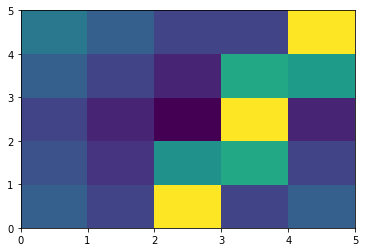

In [42]:
plt.pcolor(likelihood_heatmap1)

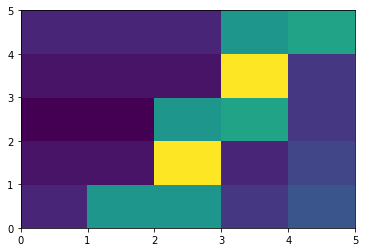

In [17]:
plt.pcolor(likelihood_heatmap2)


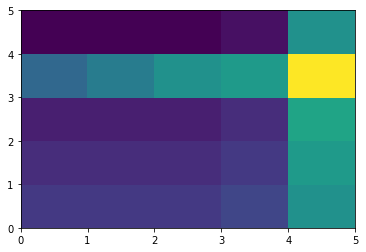

In [18]:
plt.pcolor(likelihood_heatmap3)

### Task 2
Now compute the (unscaled) log posterior by incorporating the small-motion-bias prior with the free parameter $\frac{\sigma^2}{\sigma_p^2}=0.5$ Hand in a figure showing the (unscaled) log posterior

In [43]:
def a_posteriori(vx, vy, val1, val2, likelihood):
    prior = -np.linalg.norm([vx, vy])/4
    likelihood_value = likelihood(val1, val2, 1)
    print(likelihood_value)
    return prior + likelihood_value

In [44]:
def compute_posterior(example1, example2, v_vals, likelihood):
    v_mat = np.zeros(shape=(len(v_vals), len(v_vals)))
    for vx_idx, v_x in enumerate(v_vals):
        for vy_idx, v_y in enumerate(v_vals):
            for x1 in range(len(example1)):
                x2 = x1 + v_x
                for y1 in range(len(example1[0])):
                    y2 = y1 + v_y
                    val1 = example1[y1][x1]
                    if 0 <= x2 < len(example1) and 0 <= y2 < len(example2[0]):
                        val2 = example2[y2][x2]
                    else:
                        continue
                        print("shouldnt see this")
                        val2 = 0
                    v_mat[vy_idx][vx_idx] += likelihood(val1, val2, 1)
            v_mat[vy_idx][vx_idx] += (-np.linalg.norm([v_x, v_y])/4)
    return v_mat

In [45]:
posterior_heatmap1 = compute_posterior(exampleA1, exampleA2, v_vals=[-2, -1, 0, 1, 2], likelihood=log_likelihood)

In [46]:
posterior_heatmap2 = compute_posterior(exampleB1, exampleB2, v_vals=[-2, -1, 0, 1, 2], likelihood=log_likelihood)

In [47]:
posterior_heatmap3 = compute_posterior(exampleC1, exampleC2, v_vals=[-2, -1, 0, 1, 2], likelihood=log_likelihood)

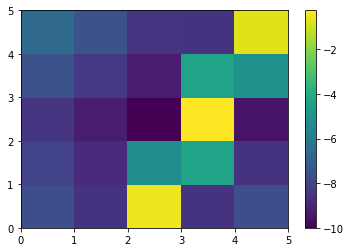

In [48]:
a_img = plt.pcolor(posterior_heatmap1)
plt.colorbar(a_img)

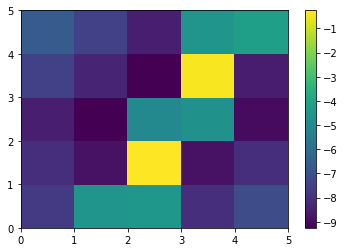

In [49]:
b_img = plt.pcolor(posterior_heatmap2)
plt.colorbar(b_img)

NameError: name 'c_img' is not defined

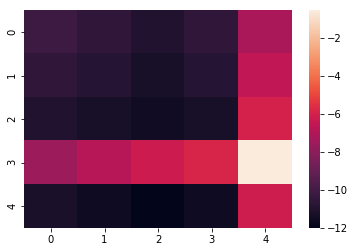

In [50]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
sns.heatmap(posterior_heatmap3)
# c_img = ax1.pcolor(posterior_heatmap3)
xlabels = [-2, -1, 0, 1, 2]
plt.colorbar(c_img)
ax1.set_xticklabels(xlabels, minor=False)


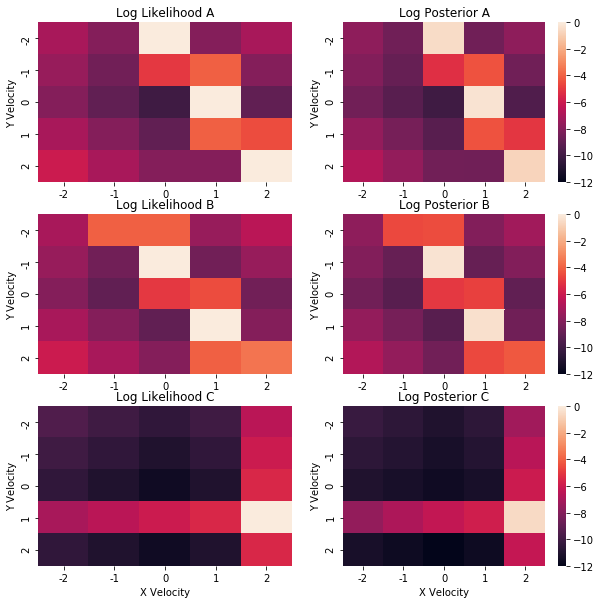

In [51]:
axlabels = [-2, -1, 0, 1, 2]

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(321)
sns.heatmap(likelihood_heatmap1, vmin=-12, vmax=0, cbar=False, xticklabels=axlabels, yticklabels=axlabels)
# fig1 = ax1.pcolor(likelihood_heatmap1, vmin=-12, vmax = 0)
ax1.title.set_text("Log Likelihood A")

ax2 = fig.add_subplot(322)
sns.heatmap(posterior_heatmap1, vmin=-12, vmax=0, xticklabels=axlabels, yticklabels=axlabels)
ax2.title.set_text("Log Posterior A")

ax3 = fig.add_subplot(323)
sns.heatmap(likelihood_heatmap2, vmin=-12, vmax=0, cbar=False, xticklabels=axlabels, yticklabels=axlabels)
ax3.title.set_text("Log Likelihood B")

ax4 = fig.add_subplot(324)
sns.heatmap(posterior_heatmap2, vmin=-12, vmax=0, xticklabels=axlabels, yticklabels=axlabels)
ax4.title.set_text("Log Posterior B")

ax5 = fig.add_subplot(325)
sns.heatmap(likelihood_heatmap3, vmin=-12, vmax=0, cbar=False, xticklabels=axlabels, yticklabels=axlabels)
ax5.title.set_text("Log Likelihood C")

ax6 = fig.add_subplot(326)
sns.heatmap(posterior_heatmap3, vmin=-12, vmax=0, xticklabels=axlabels, yticklabels=axlabels)
ax6.title.set_text("Log Posterior C")


# ax1.set_xlabel("X Velocity")
ax1.set_ylabel("Y Velocity")
# ax2.set_xlabel("X Velocity")
ax2.set_ylabel("Y Velocity")
# ax3.set_xlabel("X Velocity")
ax3.set_ylabel("Y Velocity")
# ax4.set_xlabel("X Velocity")
ax4.set_ylabel("Y Velocity")
ax5.set_xlabel("X Velocity")
ax5.set_ylabel("Y Velocity")
ax6.set_xlabel("X Velocity")
ax6.set_ylabel("Y Velocity")




In [138]:
likelihood_heatmap3

array([[-12.5, -12.5, -12.5, -12. ,  -6.5],
       [ -8.5,  -7.5,  -6.5,  -6. ,  -0.5],
       [-11.5, -11.5, -11.5, -11. ,  -5.5],
       [-11. , -11. , -11. , -10.5,  -6. ],
       [-10.5, -10.5, -10.5, -10. ,  -6.5]])

In [81]:
posterior_heatmap3

array([[-13.20710678, -13.05901699, -13.        , -12.55901699,
         -7.20710678],
       [ -9.05901699,  -7.85355339,  -6.75      ,  -6.35355339,
         -1.05901699],
       [-12.        , -11.75      , -11.5       , -11.25      ,  -6.        ],
       [-11.55901699, -11.35355339, -11.25      , -10.85355339,
         -6.55901699],
       [-11.20710678, -11.05901699, -11.        , -10.55901699,
         -7.20710678]])

## Task 3: Scaled Velocities
now compute the scaled posterior probability over velocities. Given that there are 25 discrete velocities, you can normalize so that the total probability of any velocity is 1.0. Hand in a figure showing the scaled posterior

In [52]:
scaled_posterior1 = posterior_heatmap1/sum(sum(posterior_heatmap1))
scaled_posterior2 = posterior_heatmap2/sum(sum(posterior_heatmap2))
scaled_posterior3 = posterior_heatmap3/sum(sum(posterior_heatmap3))

In [53]:
scaled_posterior1

array([[ 0.04475288,  0.04969967,  0.00290335,  0.04969967,  0.04475288],
       [ 0.04679632,  0.05140995,  0.03048519,  0.02527979,  0.04969967],
       [ 0.04935697,  0.053712  ,  0.05806703,  0.00145168,  0.05516368],
       [ 0.04389296,  0.0485066 ,  0.053712  ,  0.02527979,  0.02937621],
       [ 0.03894617,  0.04389296,  0.04935697,  0.04969967,  0.00410596]])

In [59]:
e_posterior1 = np.exp(posterior_heatmap1)
e_posterior1 = e_posterior1 / sum(sum(e_posterior1))

e_posterior2 = np.exp(posterior_heatmap2)
e_posterior2 = e_posterior2 / sum(sum(e_posterior2))

e_posterior3 = np.exp(posterior_heatmap3)
e_posterior3 = e_posterior3 / sum(sum(e_posterior3))


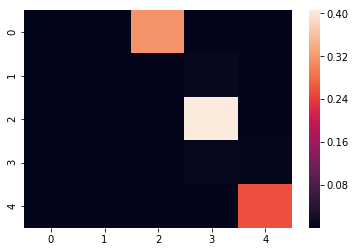

In [58]:
sns.heatmap(e_posterior)

In [55]:
scaled_posterior1

array([[ 1.04576939,  1.05095541,  1.00290757,  1.05095541,  1.04576939],
       [ 1.04790854,  1.05275438,  1.03095462,  1.02560203,  1.05095541],
       [ 1.05059532,  1.05518067,  1.05978603,  1.00145273,  1.05671356],
       [ 1.04487051,  1.0497023 ,  1.05518067,  1.02560203,  1.02981194],
       [ 1.03971452,  1.04487051,  1.05059532,  1.05095541,  1.0041144 ]])

In [201]:
sum(sum(scaled_posterior1))

1.0

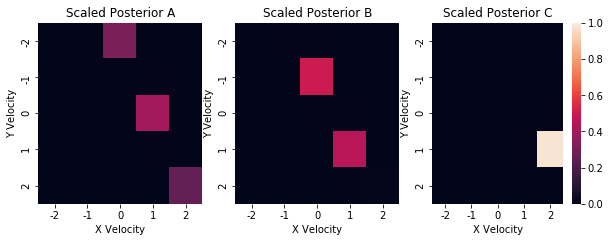

In [61]:
axlabels = [-2, -1, 0, 1, 2]
fig = plt.figure(figsize=(10, 10/3))
ax1 = fig.add_subplot(131)
sns.heatmap(e_posterior1, vmin = 0, vmax=1, cbar=False, xticklabels=axlabels, yticklabels=axlabels)
ax1.title.set_text("Scaled Posterior A")
ax2 = fig.add_subplot(132)
sns.heatmap(e_posterior2, vmin = 0, vmax = 1, cbar = False, xticklabels=axlabels, yticklabels=axlabels)
ax2.title.set_text("Scaled Posterior B")
ax3 = fig.add_subplot(133)
sns.heatmap(e_posterior3, vmin = 0, vmax = 1, xticklabels=axlabels, yticklabels=axlabels)
ax3.title.set_text("Scaled Posterior C")

ax1.set_xlabel("X Velocity")
ax1.set_ylabel("Y Velocity")
ax2.set_xlabel("X Velocity")
ax2.set_ylabel("Y Velocity")
ax3.set_xlabel("X Velocity")
ax3.set_ylabel("Y Velocity")


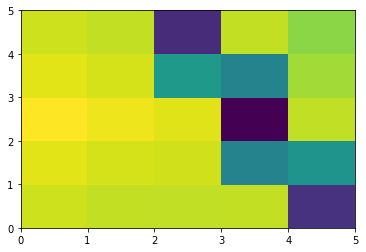

In [85]:
plt.pcolor(scaled_posterior1)

## Task 4 
Describe in a sentence or two how a maximum likelihood solution (obtained using the results of task 1) differ from the maximum a posteriori solution obtained from the results of task 2 or 3

Citing James McInerney: https://www.quora.com/What-is-the-difference-between-Maximum-Likelihood-ML-and-Maximum-a-Posteri-MAP-estimation
        
        
Maximum likelihood estimation overfits the data, resulting in high variance. Maximum a posteriori assumes that the parameters of the distribution are drawn from a random process which is shaped by beliefs about the process.

In [41]:
posterior_heatmap1

array([[-8.70710678, -8.55901699, -8.5       , -8.55901699, -0.70710678],
       [-9.05901699, -8.85355339, -8.75      , -3.85355339, -4.55901699],
       [-9.5       , -9.25      , -9.        ,  0.75      , -8.5       ],
       [-9.05901699, -8.85355339, -4.75      , -3.85355339, -8.05901699],
       [-8.70710678, -8.55901699, -0.5       , -8.55901699, -7.70710678]])

In [42]:
likelihood_heatmap1

array([[-8. , -8. , -8. , -8. ,  0. ],
       [-8.5, -8.5, -8.5, -3.5, -4. ],
       [-9. , -9. , -9. ,  1. , -8. ],
       [-8.5, -8.5, -4.5, -3.5, -7.5],
       [-8. , -8. ,  0. , -8. , -7. ]])

## Part III

For part III of this assignment, you'll implement a model from scratch has a vague relationship to the Weiss et al. (2002) ambiguous-motion model.  The model will try to infer the direction of motion from some observations.  I'll assume that a rigid motion is being observed involving an object that has two distictinctive visual features.  The figure below shows a snapshot of the object at two nearby points in time.  The distinctive features are the red triangle and blue square.  Let's call them R and B for short.


Because the features are distinctive, determining the correspondence between features at two snapshots in time is straightforward, and the velocity vector can be estimated.  Assume that these measurements are noisy however, such that the x and y components of the velocity are each corrupted by independent, mean zero Gaussian noise with standard deviation σ.   Thus the observation consists of four real valued numbers: Rx, Ry, Bx, and By -- respectively, the red element x and y velocities, and the blue element x and y velocities.  The goal of the model is to infer the direction of motion.


To simplify, let's assume there are only four directions: up, down, left, and right.  Further, the motions will all be one unit step.  Thus, if the motion is to the right, then noise-free observations would be:  Rx=1, Ry=0, Bx=1, By=0.  If the motion is down, then the noise-free observations would be: Rx=0, Ry=-1, Bx=0, By=-1.

Formally, the model must compute P(Direction | Rx, Ry, Bx, By).



### Task I
Suppose the prior over directions is uniform.  Compute the posterior given Rx = 0.75, Ry = -0.6, Bx = 1.4, By = -0.2.  Use σ=1.


In [175]:
def task3_motion_posterior(direction, sigma, prior = 0.25, rx=0.75 ,ry=-0.6, bx=1.4, by=-0.2):
    ux = direction[0]
    uy = direction[1]
    posterior = prior * \
    scipy.stats.norm(ux, sigma).pdf(rx) *\
    scipy.stats.norm(uy, sigma).pdf(ry) *\
    scipy.stats.norm(ux, sigma).pdf(bx) *\
    scipy.stats.norm(uy, sigma).pdf(by)
    return posterior
    

In [107]:
posterior_up = task3_motion_posterior(direction=[0, 1], sigma = 1)
posterior_down = task3_motion_posterior(direction=[0, -1], sigma = 1)
posterior_left = task3_motion_posterior(direction=[-1, 0], sigma = 1)
posterior_right = task3_motion_posterior(direction=[1, 0], sigma = 1)


In [108]:
print("Posterior Up: {}".format(posterior_up))
print("Posterior Down: {}".format(posterior_down))
print("Posterior Left: {}".format(posterior_left))
print("Posterior Right: {}".format(posterior_right))

Posterior Up: 0.00024279368845727203
Posterior Down: 0.0012025650113673544
Posterior Left: 6.294189907884059e-05
Posterior Right: 0.004638804977171331


### Task II
Using the same observations, do the computation for σ=5.  


In [100]:
posterior_up = task3_motion_posterior(direction=[0, 1], sigma = 5)
posterior_down = task3_motion_posterior(direction=[0, -1], sigma = 5)
posterior_left = task3_motion_posterior(direction=[-1, 0], sigma = 5)
posterior_right = task3_motion_posterior(direction=[1, 0], sigma = 5)


In [101]:
print("Posterior Up: {}".format(posterior_up))
print("Posterior Down: {}".format(posterior_down))
print("Posterior Left: {}".format(posterior_left))
print("Posterior Right: {}".format(posterior_right))

Posterior Up: 8.89296410678425e-06
Posterior Down: 9.480721436701585e-06
Posterior Left: 8.425479716735484e-06
Posterior Right: 1.0006755493760114e-05


### Task III
Using the same observations, do the computation assuming a prior in which 'down' is 5 times as likely as 'up', 'left', and 'right'.  Use σ=1.


In [111]:
posterior_up = task3_motion_posterior(direction=[0, 1], sigma = 1, prior=1/8)
posterior_down = task3_motion_posterior(direction=[0, -1], sigma = 1, prior = 5/8)
posterior_left = task3_motion_posterior(direction=[-1, 0], sigma = 1, prior = 1/8)
posterior_right = task3_motion_posterior(direction=[1, 0], sigma = 1, prior = 1/8)


In [112]:
print("Posterior Up: {}".format(posterior_up))
print("Posterior Down: {}".format(posterior_down))
print("Posterior Left: {}".format(posterior_left))
print("Posterior Right: {}".format(posterior_right))

Posterior Up: 0.00012139684422863602
Posterior Down: 0.003006412528418385
Posterior Left: 3.147094953942029e-05
Posterior Right: 0.0023194024885856653


### Task IV
Using the same observations and priors, do the computation for σ=5.

In [113]:
posterior_up = task3_motion_posterior(direction=[0, 1], sigma = 5, prior=1/8)
posterior_down = task3_motion_posterior(direction=[0, -1], sigma = 5, prior = 5/8)
posterior_left = task3_motion_posterior(direction=[-1, 0], sigma = 5, prior = 1/8)
posterior_right = task3_motion_posterior(direction=[1, 0], sigma = 5, prior = 1/8)


In [114]:
print("Posterior Up: {}".format(posterior_up))
print("Posterior Down: {}".format(posterior_down))
print("Posterior Left: {}".format(posterior_left))
print("Posterior Right: {}".format(posterior_right))

Posterior Up: 4.446482053392125e-06
Posterior Down: 2.3701803591753963e-05
Posterior Left: 4.212739858367742e-06
Posterior Right: 5.003377746880057e-06
